In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import os
import straxbra


In [13]:
ctx = straxbra.XebraContext()

In [14]:
run = '00187'
peaks_data_xebra = ctx.get_array(run, 'peaks')

In [4]:
# run_raw = '00051'
# raw = ctx.get_array(run_raw, 'raw_records')
# waveform_raw = raw['data']



In [5]:
# for i in range(0,1000):

#     fig, ax1 = plt.subplots(sharex=False, figsize=(12, 3.5))
#     ax1.plot(waveform_raw[i])
#     plt.show()

In [15]:
waveform = peaks_data_xebra['data']
integral = peaks_data_xebra['area']
width = peaks_data_xebra['width'][:,5]
width_decile = -peaks_data_xebra['area_decile_from_midpoint'][:,1]

In [7]:
def CutCondition(integral, width, i):

    if integral[i] > 3000 and integral[i] < 4500 and width[i] > 10 and width[i] < 50 \
    :
        return(True)
    else:
        return(False)

In [8]:
def PrintWaveform(waveform,i):
    
    fig, ax1 = plt.subplots(sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    plt.show()


In [9]:
def Process(waveform, i):
    
    SelectionCutFlag = CutCondition(integral, width, i)
    PrintingFlag = True


    if PrintingFlag and SelectionCutFlag:
#         PrintWaveform(waveform,i)
        cut_integral.append(integral[i])
        cut_width.append(width[i])

    return()

In [10]:
cut_integral = []
cut_width = []

for i in range(0,len(waveform)):
    
    Process(waveform,i)

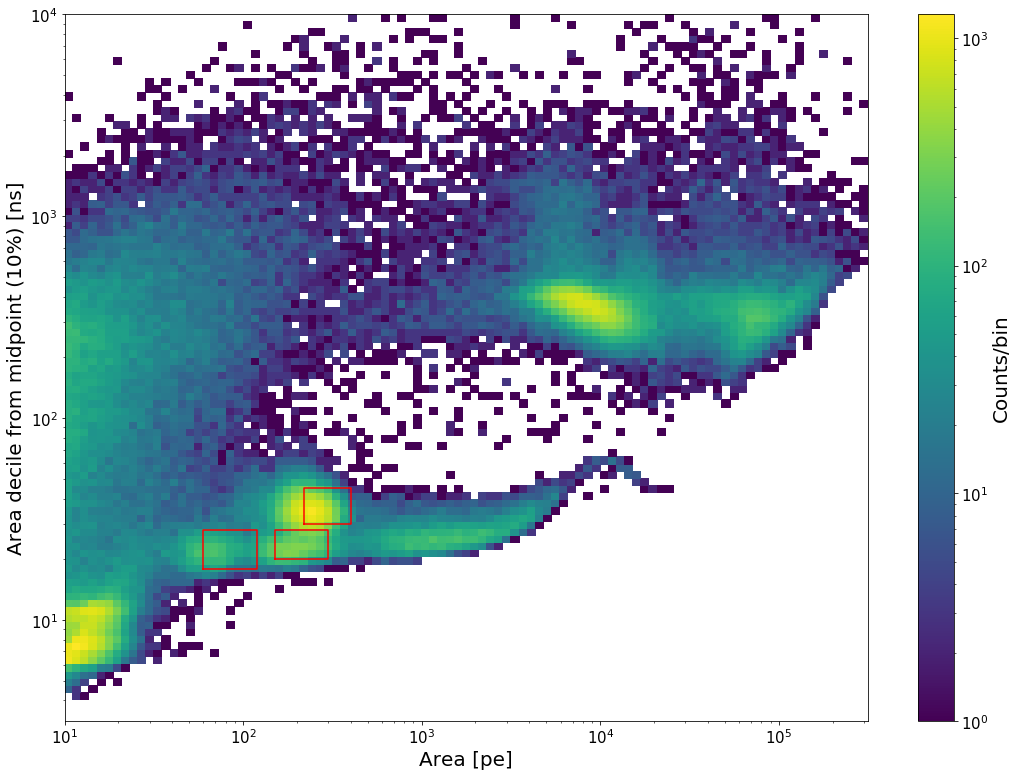

325295


In [16]:
fig, ax1 = plt.subplots(figsize=(18,13))

bins_x = np.logspace(1,5.5,100)
bins_y = np.logspace(0.5,4,100)
histo_max= 2*10**3
pS2 = np.array([(3000,200),(20000,600)], dtype=[('area', np.float32), ('rt', np.float32)])
p41 = np.array([(220,30),(400,45)], dtype=[('area', np.float32), ('rt', np.float32)])
p32 = np.array([(150,20),(300,28)], dtype=[('area', np.float32), ('rt', np.float32)])
p09 = np.array([(60,18),(120,28)], dtype=[('area', np.float32), ('rt', np.float32)])

ax1.plot(p41['area'][[0,1,1,0,0]],p41['rt'][[0,0,1,1,0]], c='r')
ax1.plot(p32['area'][[0,1,1,0,0]],p32['rt'][[0,0,1,1,0]], c='r')
ax1.plot(p09['area'][[0,1,1,0,0]],p09['rt'][[0,0,1,1,0]], c='r')


counts1, _, _ = np.histogram2d(integral, width_decile, bins=(bins_x, bins_y))
#counts2, _, _ = np.histogram2d(cut_integral, cut_width, bins=(bins_x, bins_y))
im1 = ax1.pcolormesh(bins_x, bins_y, counts1.T, norm=LogNorm())
cb1 = plt.colorbar(im1, ax=ax1, label='Counts/bin')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Area [pe]')
ax1.set_ylabel('Area decile from midpoint (10%) [ns]')

SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)

#ax1.plot(pS2['area'][[0,1,1,0,0]],pS2['rt'][[0,0,1,1,0]], c='r')
# im2 = ax2.pcolormesh(bins_x, bins_y, counts2.T, norm=LogNorm())
# cb2 = plt.colorbar(im2, ax=ax2, label='Counts/bin')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_xlabel('Area [pe]')
# ax2.set_ylabel('Width [ns]')

plt.show()
print(len(waveform))